In [140]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# 读取数据文件
df = pd.read_csv('/kaggle/input/housing-price-prediction-data/housing_price_dataset.csv')

# 分析房屋的’RM’， ‘LSTAT’，'CRIM’ 特征与MEDV的相关性性，所以，将其余不相关特征移除
boston_df = df[['SquareFeet', 'Bedrooms', 'Bathrooms', 'Neighborhood', 'YearBuilt', 'Price']]

# 对非数值型特征进行独热编码
boston_df_encoded = pd.get_dummies(boston_df, columns=['Neighborhood'])

# 对非数值型特征进行独热编码
print(boston_df_encoded)

# 目标值
y = np.array(boston_df_encoded['Price'])
boston_df = boston_df_encoded.drop(['Price'], axis=1)
# 特征值
X = np.array(boston_df)


       SquareFeet  Bedrooms  Bathrooms  YearBuilt          Price  \
0            2126         4          1       1969  215355.283618   
1            2459         3          2       1980  195014.221626   
2            1860         2          1       1970  306891.012076   
3            2294         2          1       1996  206786.787153   
4            2130         5          2       2001  272436.239065   
...           ...       ...        ...        ...            ...   
49995        1282         5          3       1975  100080.865895   
49996        2854         2          2       1988  374507.656727   
49997        2979         5          3       1962  384110.555590   
49998        2596         5          2       1984  380512.685957   
49999        1572         5          3       2011  221618.583218   

       Neighborhood_Rural  Neighborhood_Suburb  Neighborhood_Urban  
0                    True                False               False  
1                    True                Fals

In [141]:
from sklearn import preprocessing
# 初始化标准化器
min_max_scaler = preprocessing.MinMaxScaler()
# 分别对训练和测试数据的特征以及目标值进行标准化处理
X_train = min_max_scaler.fit_transform(X_train)
y_train = min_max_scaler.fit_transform(y_train.reshape(-1,1)) # reshape(-1,1)指将它转化为1列，行自动确定
X_test = min_max_scaler.fit_transform(X_test)
y_test = min_max_scaler.fit_transform(y_test.reshape(-1,1))

In [142]:
from sklearn.model_selection import train_test_split
 
#70%用于训练，30%用于测试
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(35000, 7) (15000, 7) (35000,) (15000,)


In [143]:
#线性回归
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
# 使用训练数据进行参数估计
lr.fit(X_train, y_train)

# 使用测试数据进行回归预测
y_test_pred = lr.predict(X_test)
print('y_test_pred : ', y_test_pred)
# 训使用测试数据进行回归预测
y_train_pred = lr.predict(X_train)
print('y_train_pred : ', y_train_pred)

# 输出线性回归的系数
print('线性回归的系数为:\n w = %s \n b = %s' % (lr.coef_, lr.intercept_))

y_test_pred :  [271304.34440512 211969.80531475 229739.22327695 ... 227268.65276027
 142297.61648461 307979.73686413]
y_train_pred :  [266756.94967754 127115.60392263 298768.72506573 ... 184516.2027887
 169273.83753036 169983.7844769 ]
线性回归的系数为:
 w = [   99.63485427  4964.64780461  2712.72802798   -26.19239964
   -89.2996432  -1245.87387365  1335.17351685] 
 b = 54087.74309047035


In [144]:
# 绘图函数
def figure(title, *datalist):
    plt.figure(facecolor='gray', figsize=[16, 8])
    for v in datalist:
        plt.plot(v[0], '-', label=v[1], linewidth=2)
        plt.plot(v[0], 'o')
    plt.grid()
    plt.title(title, fontsize=20)
    plt.legend(fontsize=16)
    plt.show()

In [145]:
# 计算均分方差
train_MSE = [mean_squared_error(y_train, [np.mean(y_train)] * len(y_train)),
               mean_squared_error(y_train, y_train_pred)]
 
#计算平均绝对误差
train_MAE = [mean_absolute_error(y_train, [np.mean(y_train)] * len(y_train)),
               mean_absolute_error(y_train, y_train_pred)]

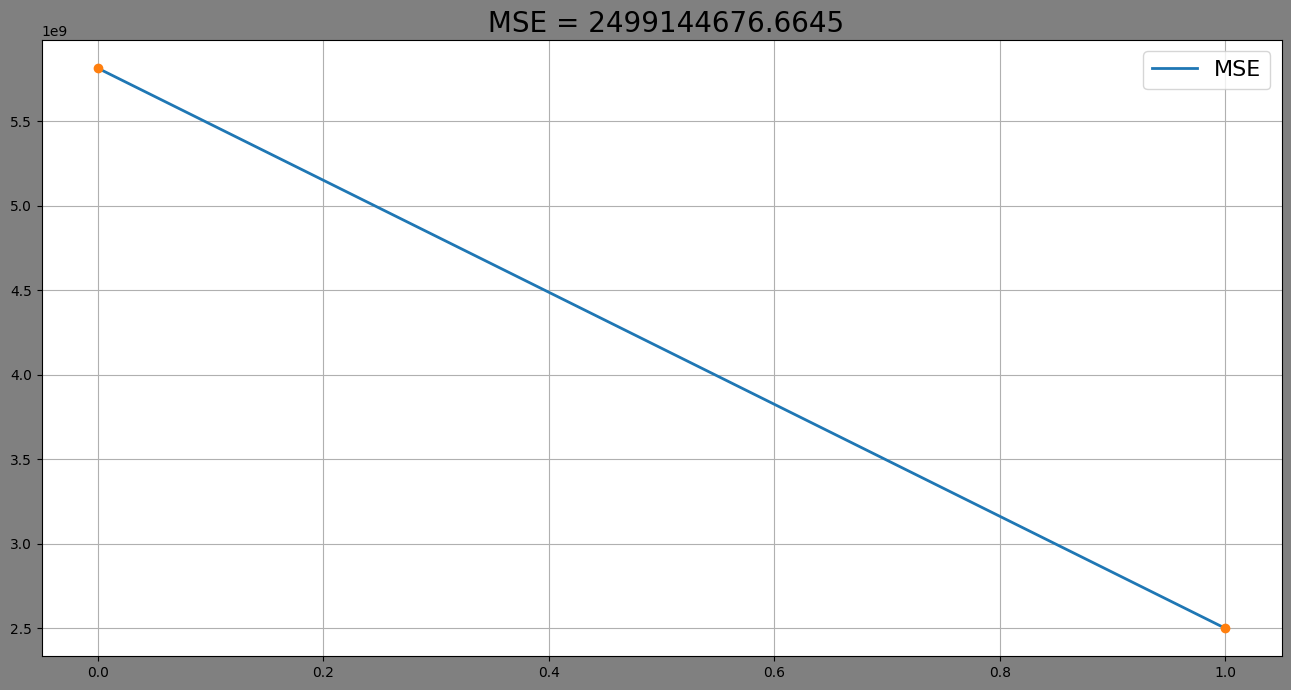

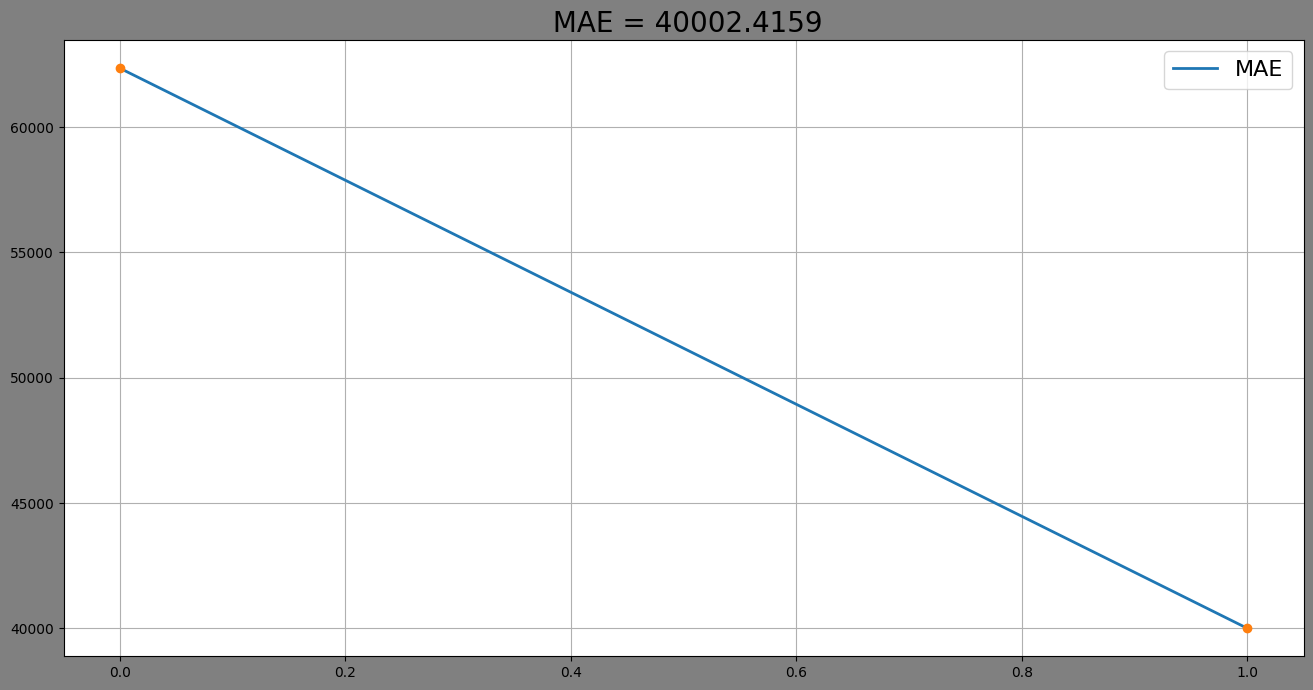

In [146]:
figure(' MSE = %.4f' % (train_MSE[-1]), [train_MSE, 'MSE'])
figure(' MAE = %.4f' % (train_MAE[-1]), [train_MAE, 'MAE'])

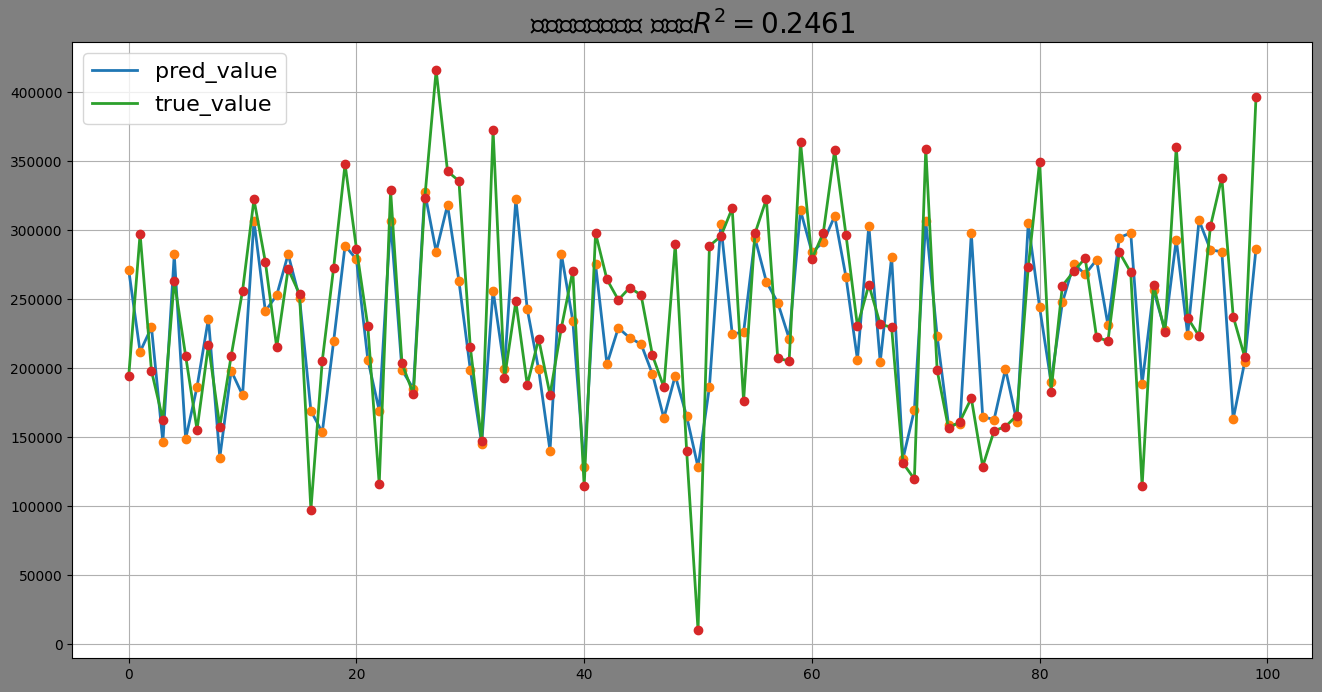

线性回归的系数为:
 w = [   99.63485427  4964.64780461  2712.72802798   -26.19239964
   -89.2996432  -1245.87387365  1335.17351685] 
 b = 54087.74309047035


In [147]:
figure('预测值与真实值图 模型的' + r'$R^2=%.4f$' % (r2_score(y_train_pred, y_train)),
       [y_test_pred[:100], 'pred_value'],
       [y_test[:100], 'true_value'])

# 线性回归的系数
print('线性回归的系数为:\n w = %s \n b = %s' % (lr.coef_, lr.intercept_))